<font color='lightblue' size=6>Practice 1: Second part. Implementation and evaluation with value iteration rule</font>

<font color='red'> Modify this text section and put your name in *bold*
</font>
---

Recall from theory slides the scenario with no determinism transitions.

In [75]:
import numpy as np
state = [0,1,2,3,4]
action = [0,1,2] # left, stay, right movements
T = np.array([[[1/2,1/2,0,0,0],[1/2,1/2,0,0,0],[2/3,1/3,0,0,0]],
              [[1/3,2/3,0,0,0],[1/4,1/2,1/4,0,0],[0,2/3,1/3,0,0]],
              [[0,1/3,2/3,0,0],[0,1/4,1/2,1/4,0],[0,0,2/3,1/3,0]],
              [[0,0,1/3,2/3,0],[0,0,1/4,1/2,1/4],[0,0,0,2/3,1/3]],
              [[0,0,0,1/3,2/3],[0,0,0,1/2,1/2],[0,0,0,1/2,1/2]]])
num_states = 5
num_actions = 3
gamma = 1/2
R = np.zeros(5)
R[4] = 1

<font color='brown' size=6> *Exercise* </font>

Write a function implementing the value iteration algorithm. The function must return the V\* array containing the optimal value for each state. With the above proposed values, the result should be:

[0.00833333 0.025      0.1        0.4        1.6       ]

In [63]:
def ValueIteration(T, num_states, num_actions, gamma, R):
    vlast = np.zeros(num_states).astype(float)
    vcurr = np.zeros_like(vlast).astype(float)
    _actionsSet = np.zeros(num_actions).astype(float)

    iterations = 0
    difference = 0.00
    while 1:
        # for each state
        for _state in range(num_states):
            # for each action:
            _actionsSet = np.zeros(num_actions).astype(float)
            for _action in range(num_actions):
                action_val = T[_state][_action] * (R + gamma * vlast)
                action_val = np.sum(action_val)
                _actionsSet[_action] = action_val

            selected = np.max(_actionsSet)
            vcurr[_state] = selected
        
        difference = vcurr-vlast
        difference = abs(vcurr-vlast)
        difference = np.max(difference)
        
        print(f"v_{iterations} {vlast} // dif = {difference}")
        if difference < 0.02: break
        vlast = vcurr.copy()
        
        iterations += 1
        

    return vlast, iterations

V, iterations = ValueIteration(T, num_states, num_actions, gamma, R)

print(f"V = {V[0]} (necessary iterations = {iterations})")

v_0 [0. 0. 0. 0. 0.] // dif = 0.6666666666666666
v_1 [0.         0.         0.         0.33333333 0.66666667] // dif = 0.2777777777777778
v_2 [0.         0.         0.05555556 0.55555556 0.94444444] // dif = 0.12962962962962976
v_3 [0.         0.00925926 0.11111111 0.67592593 1.07407407] // dif = 0.06327160493827155
v_4 [0.00231481 0.02160494 0.14969136 0.73765432 1.13734568] // dif = 0.03137860082304522
v_5 [0.00597994 0.03215021 0.17283951 0.76877572 1.16872428] // dif = 0.015646433470507537
V = 0.005979938271604938 (necessary iterations = 5)


In [98]:
def ValueIteration(T, num_states, num_actions, gamma, R):
    vlast = np.zeros(num_states)
    _vcurr = np.zeros(num_states)
    _actions_sep = np.zeros(num_actions)

    k = 0
    while k >= 0:
        _vcurr = np.zeros(num_states)
        for _s in range(num_states):
            vlast_prima = np.roll(vlast, -1)
            vlast_prima[-1] = 0
            _actions_sep = np.zeros(num_actions)
            for _a in range(num_actions):
                _a_sep_value = T[_s][_a] * (R + gamma * vlast_prima)
                _actions_sep[_a] = sum(_a_sep_value)
            _vcurr[_s] = max(_actions_sep)

        dif = max(abs(_vcurr - vlast))
        vlast = _vcurr.copy()
        print(f"Vcurr({k}) [{_vcurr}]; Difference {dif}")
        # if dif < 0.000002: break
        k += 1

    return vlast, k

V, iterations = ValueIteration(T, num_states, num_actions, gamma, R)
print(f"V = {V} (necessary iterations = {iterations})")


Vcurr(0) [[0.         0.         0.         0.33333333 0.66666667]]; Difference 0.6666666666666666
Vcurr(1) [[0.         0.05555556 0.22222222 0.55555556 0.77777778]]; Difference 0.22222222222222227
Vcurr(2) [[0.06944444 0.16666667 0.31481481 0.59259259 0.7962963 ]]; Difference 0.1111111111111111
Vcurr(3) [[0.12037037 0.2037037  0.33024691 0.59876543 0.79938272]]; Difference 0.0509259259259259
Vcurr(4) [[0.13348765 0.20987654 0.33281893 0.59979424 0.79989712]]; Difference 0.013117283950617287
Vcurr(5) [[0.13567387 0.21090535 0.3332476  0.59996571 0.79998285]]; Difference 0.0021862139917695478
Vcurr(6) [[0.13603824 0.21107682 0.33331904 0.59999428 0.79999714]]; Difference 0.0003643689986282672
Vcurr(7) [[0.13609897 0.2111054  0.33333095 0.59999905 0.79999952]]; Difference 6.072816643803991e-05
Vcurr(8) [[0.13610909 0.21111016 0.33333294 0.59999984 0.79999992]]; Difference 1.0121361073006652e-05
Vcurr(9) [[0.13611077 0.21111095 0.33333327 0.59999997 0.79999999]]; Difference 1.68689351215

KeyboardInterrupt: 

In [105]:
def ValueIteration(T, num_states, num_actions, gamma, R):
    vlast = np.zeros(num_states)
    vcurr = np.zeros(num_states)

    for i in range(200):
        vlast = vcurr.copy()
        for s in range(num_states):
            maxA = []
            for a in range(num_actions):
                sumVect = []
                for sa in range(num_states):
                    sumVect.append(T[s][a][sa] * (R[s] + gamma * vlast[sa]))
                sumVect = sum(sumVect)
                maxA.append(sumVect)
            vcurr[s] = max(maxA)

    return vcurr

print(ValueIteration(T, num_states, num_actions, gamma, R))
               




[0.00833333 0.025      0.1        0.4        1.6       ]


In [94]:
vlast = np.array([0,0,0,0,1])

print(vlast)

print(np.roll(vlast, -1))

[0 0 0 0 1]
[0 0 0 1 0]


<font color='brown' size=6> *Exercise* </font>

Lets calculate now what is the optimum policy given this optimum values for the states.

First, write a function to calculate Q\*(s,a) from V\* for all state s and all action a. This function must return a (num_state, num_action) bidimensional array.

For this scenario. given V\* calculated with gamma = 0.5 the result should be:

[[0.00833333 0.00833333 0.00694444]

 [0.00972222 0.01979166 0.025     ]

 [0.0375     0.078125   0.1       ]

 [0.15       0.3125     0.4       ]

 [1.6        1.5        1.5       ]]


In [ ]:
def QValueFromV(T, num_states, num_actions, gamma, R, V):






Q = QValueFromV(T, num_states, num_actions, gamma, R, V)
print(Q)


<font color='brown' size=6> *Exercise* </font>

Now, calculate the optimum policy from Q*(s,a). Write a function for doing that. For the already proposed values the result should be:

[0. 2. 2. 2. 0.]

In [ ]:
def OptimalPolicy(num_states,Q):





print(OptimalPolicy(num_states, Q))

<font color='brown' size=6> *Exercise* </font>

Let's do a graphical study about how the value of V\* changes as gamma changes too. First, import mapplotlib as you already did in the first part of this practice.
Remember to import matplotlib and put the size of the image as 7,4.

In [ ]:
import


Then, calculate and store V\* for the gamma values:

gamma = (0.1, 0.25, 0.5, 0,75, 0.9, 1)

Next, write matplotlib python code to show **this** plot (each line corresponds with the values of each state, from state 0 to state 4, in each of the gamma values proposed):

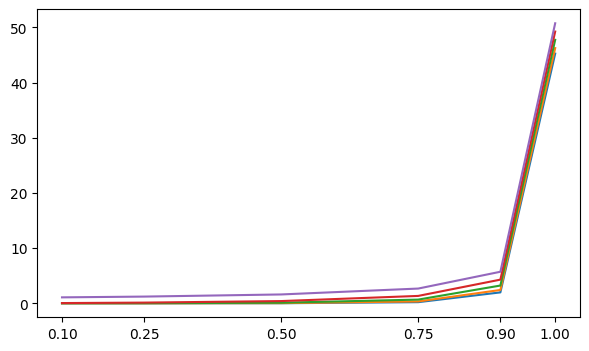

Explain in the next text cell what do you observe from this plot for this scenario

Write here your thoughts